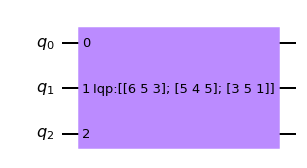

In [1]:
from qiskit.circuit.library import IQP
import qiskit.tools.jupyter
A = [[6, 5, 3], [5, 4, 5], [3, 5, 1]]
circuit = IQP(A)
circuit.draw('mpl')

In [2]:
from qiskit.circuit.library import IQP
import qiskit.tools.jupyter
A = [[6, 5, 3], [5, 4, 5], [3, 5, 1]]
circuit = IQP(A)
%circuit_library_info circuit.decompose()